# Importar Librerias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import sympy as sp
import scipy as sc
from   datetime import datetime, timedelta
import statsmodels.api as sm
import os
import matplotlib as mpl
from os.path import dirname, join as pjoin
import scipy.io as sio
from matplotlib import cm
import glob



In [2]:
plt.style.use('seaborn-paper')
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['font.sans-serif'] = "Century Gothic"
mpl.rcParams['font.family'] = "Century Gothic"
mpl.rcParams['font.weight'] = 'normal'

In [3]:
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    return datetime.fromordinal(int(datenum)) \
           + timedelta(days=days) \
           - timedelta(days=366)      # Función para convertir fechas en formato datenum a datetime

# Lectura de Datos 

In [40]:
paths = glob.glob(r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\DATOS_CAMPO\DATOS_SAI_4_15_nov_2021\AWAC600\*.wad")
paths = sorted(paths)

In [41]:
len(paths)

192

In [30]:
# leer el primer path
data_aw600=pd.read_csv(paths[4],delimiter='\s+',encoding = "ISO-8859-1",
                     names=["Month","Day","Year","Hour",'Minute','Second','Pressure','Spare','Analog input','Velocity (Beam1|X|East)','Velocity (Beam2|Y|North)','Velocity (Beam3|Z|Up)','Velocity (Beam4)','Amplitude (Beam1)','Amplitude (Beam2)','Amplitude (Beam3)','Amplitude (Beam4)'])
# data_aw600['Velocity (Beam1|X|East)'].values.shape

In [49]:
data_aw600

,Month,Day,Year,Hour,Minute,Second,Pressure,Spare,Analog input,Velocity (Beam1|X|East),Velocity (Beam2|Y|North),Velocity (Beam3|Z|Up),Velocity (Beam4),Amplitude (Beam1),Amplitude (Beam2),Amplitude (Beam3),Amplitude (Beam4)
0,11,14,2021,12,22,47.0,0.022,0.0,0,-3.902,2.795,3.406,1.437,108,82,77,86
1,11,14,2021,12,22,48.0,0.027,0.0,0,-0.520,3.194,3.389,2.802,108,82,78,86
2,11,14,2021,12,22,49.0,0.024,0.0,0,0.380,3.193,3.365,2.911,108,83,77,87
3,11,14,2021,12,22,50.0,0.027,0.0,0,-1.619,3.341,3.429,2.523,108,83,78,86
4,11,14,2021,12,22,51.0,0.025,0.0,0,-2.508,3.196,3.380,3.530,108,83,78,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,11,14,2021,12,39,46.0,0.022,0.0,0,1.880,2.787,3.905,-3.125,109,79,75,91
1020,11,14,2021,12,39,47.0,0.024,0.0,0,2.127,2.778,3.888,-2.782,108,80,75,91
1021,11,14,2021,12,39,48.0,0.024,0.0,0,1.473,2.833,3.827,-2.691,108,80,75,91
1022,11,14,2021,12,39,49.0,0.023,0.0,0,1.613,2.754,3.891,-2.773,108,80,76,92


In [161]:
r = r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\AWAC600\AW60002.v2"
Lista_names = []
for i in range (0,30):
    names = 'v1_'+str(i+1)
#     print (names)
    Lista_names.append(names)

data_aw600v1=pd.read_csv(r,delimiter='\s+',encoding = "ISO-8859-1",names = Lista_names)
data_aw600v1


,v1_1,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,v1_8,v1_9,v1_10,...,v1_21,v1_22,v1_23,v1_24,v1_25,v1_26,v1_27,v1_28,v1_29,v1_30
0,-0.385,-0.314,0.060,-0.203,-0.038,0.119,0.163,-0.086,-0.344,0.528,...,0.006,-0.154,0.132,0.270,0.237,0.214,-0.257,0.370,0.027,0.353
1,-0.394,-0.295,0.227,-0.207,-0.465,-0.345,-0.360,0.468,-0.135,0.478,...,0.053,-0.005,0.121,-0.066,-0.162,-0.029,0.025,0.398,-0.084,0.104
2,-1.052,-0.219,0.096,-0.541,0.580,0.053,-0.110,-0.040,-0.121,-0.258,...,0.047,-0.104,-0.013,-0.189,-0.154,-0.513,0.041,-0.274,-0.623,-0.547
3,3.124,1.066,1.478,0.915,1.410,1.250,1.155,0.955,0.824,1.023,...,1.116,1.094,1.102,1.213,0.928,0.973,1.363,1.041,0.772,0.717
4,7.301,2.352,2.860,2.371,2.241,2.447,2.420,1.950,1.770,2.305,...,2.185,2.293,2.217,2.616,2.011,2.459,2.685,2.357,2.167,1.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-0.735,0.921,0.650,1.147,1.173,0.486,1.071,0.786,0.722,0.734,...,0.842,0.524,0.857,0.421,1.065,1.099,0.575,0.543,0.602,0.839
391,0.465,0.422,1.304,1.349,1.376,1.018,0.858,0.985,0.848,1.105,...,1.188,1.148,1.293,1.320,1.043,0.658,1.333,0.313,1.040,0.661
392,0.779,1.216,0.918,1.011,1.356,0.858,0.668,0.805,0.989,0.303,...,0.588,1.026,0.999,0.813,0.750,0.634,0.746,0.903,0.851,1.065
393,1.511,-0.733,-0.657,-0.852,-0.715,-0.383,-1.199,-1.123,-1.167,-1.220,...,-1.265,0.047,-0.944,-0.935,-0.470,-0.753,-1.137,-1.128,-0.980,-1.075


In [162]:
data_v1 = data_aw600v1[7:380]
data_v1

,v1_1,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,v1_8,v1_9,v1_10,...,v1_21,v1_22,v1_23,v1_24,v1_25,v1_26,v1_27,v1_28,v1_29,v1_30
7,0.141,0.151,0.091,0.128,0.136,0.147,0.139,0.124,0.059,0.075,...,0.050,0.063,0.111,0.109,0.103,0.100,0.102,0.085,0.073,0.013
8,0.092,0.097,0.111,0.132,0.108,0.089,0.135,0.111,0.111,0.067,...,0.096,0.068,0.064,0.099,0.132,0.090,0.113,0.051,0.047,0.165
9,0.108,0.118,0.105,0.176,0.140,0.131,0.122,0.100,0.141,0.098,...,0.050,0.119,0.149,0.076,0.142,0.141,0.082,-0.038,-0.022,0.055
10,0.170,0.179,0.174,0.173,0.172,0.128,0.130,0.140,0.118,0.112,...,0.097,0.112,0.097,0.128,0.171,0.113,0.115,0.123,0.137,0.124
11,0.133,0.157,0.171,0.212,0.212,0.175,0.207,0.138,0.160,0.158,...,0.071,0.074,0.103,0.103,0.105,0.123,0.105,0.161,0.152,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.023,0.021,-0.036,-0.004,-0.034,-0.038,-0.059,0.018,-0.043,-0.025,...,-0.070,-0.002,-0.054,-0.023,0.008,0.041,0.027,-0.015,0.035,0.070
376,-0.007,-0.056,-0.016,-0.048,-0.025,-0.059,-0.107,-0.070,-0.068,-0.019,...,-0.021,-0.043,-0.003,-0.014,-0.016,-0.010,-0.041,-0.046,-0.056,-0.007
377,-0.029,0.025,-0.069,-0.061,-0.049,-0.040,-0.066,-0.023,-0.031,0.021,...,-0.048,-0.032,-0.013,-0.002,0.019,-0.034,-0.007,0.006,0.045,-0.002
378,0.024,0.033,0.049,0.062,0.049,0.009,0.019,0.009,0.009,-0.003,...,-0.059,-0.033,-0.050,0.013,-0.078,-0.044,-0.063,-0.018,-0.044,0.054


In [163]:
data_v1['v1_'+str(1)]

7      0.141
8      0.092
9      0.108
10     0.170
11     0.133
       ...  
375    0.023
376   -0.007
377   -0.029
378    0.024
379    0.035
Name: v1_1, Length: 373, dtype: float64

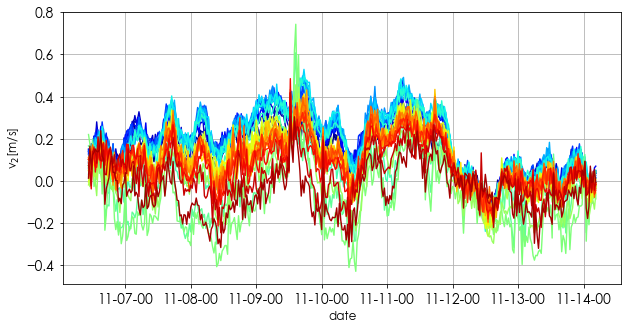

In [164]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= 30)
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,5))
for i in range (0, 30):
    date_format = mdates.DateFormatter('%m-%d-%H')
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(time[7:380],data_v1['v1_'+str(i+1)],color=colorVal\
                 ,ls ='-', label = 'nivel'+str(i+1))
    ax.xaxis.set_major_formatter(date_format)
ax.set_ylabel('v$_2$[m/s]',size=12)
ax.set_xlabel('date',size=12)
# ax.xaxis.tick_top()
# ax.invert_yaxis()
ax.grid()
# _= ax.legend(fontsize=9.5, bbox_to_anchor=(1.2, 1))

In [31]:
in_swan = datetime(2021,11,6,7,0)      # Incio de almacenamiento de datos de SWAN
fin_swan = datetime(2021,11,14,12,30)    # Fin de almacenamiento de datos de SWAN
escala_temporal = int(input('ingrese resolución temporal:'))                 # resolución temporal en minutos
minutes_swan =int((fin_swan-in_swan).days*24 + (fin_swan-in_swan).seconds/3600)*60+escala_temporal  # minutos de almacenamiento en swan
time = np.array([in_swan + timedelta(minutes=m) for m in range(0,int(minutes_swan),escala_temporal)]) # Vector de timepos por hora, como se registro con Swan

ingrese resolución temporal:0


ValueError: range() arg 3 must not be zero

In [152]:
time[7:380]

array([datetime.datetime(2021, 11, 6, 10, 30),
       datetime.datetime(2021, 11, 6, 11, 0),
       datetime.datetime(2021, 11, 6, 11, 30),
       datetime.datetime(2021, 11, 6, 12, 0),
       datetime.datetime(2021, 11, 6, 12, 30),
       datetime.datetime(2021, 11, 6, 13, 0),
       datetime.datetime(2021, 11, 6, 13, 30),
       datetime.datetime(2021, 11, 6, 14, 0),
       datetime.datetime(2021, 11, 6, 14, 30),
       datetime.datetime(2021, 11, 6, 15, 0),
       datetime.datetime(2021, 11, 6, 15, 30),
       datetime.datetime(2021, 11, 6, 16, 0),
       datetime.datetime(2021, 11, 6, 16, 30),
       datetime.datetime(2021, 11, 6, 17, 0),
       datetime.datetime(2021, 11, 6, 17, 30),
       datetime.datetime(2021, 11, 6, 18, 0),
       datetime.datetime(2021, 11, 6, 18, 30),
       datetime.datetime(2021, 11, 6, 19, 0),
       datetime.datetime(2021, 11, 6, 19, 30),
       datetime.datetime(2021, 11, 6, 20, 0),
       datetime.datetime(2021, 11, 6, 20, 30),
       datetime.datetim

In [42]:
time = np.zeros(shape = (len(paths)*1024),dtype='datetime64[s]')
Presion = np.zeros(len(paths)*1024)
for i in range (0, len(paths)):
    data_aw600=pd.read_csv(paths[i],delimiter='\s+',encoding = "ISO-8859-1",
                     names=["Month","Day","Year","Hour",'Minute','Second','Pressure','Spare','Analog input','Velocity (Beam1|X|East)','Velocity (Beam2|Y|North)','Velocity (Beam3|Z|Up)','Velocity (Beam4)','Amplitude (Beam1)','Amplitude (Beam2)','Amplitude (Beam3)','Amplitude (Beam4)'])
    Presion[1024*i:1024*(i+1)] = data_aw600.Pressure.values
    if data_aw600.shape[0] != 1024:
        print(paths[i])
        print(i)
    else:
        pass
    time_burst =  np.zeros(shape = (1024),dtype='datetime64[s]')
    for j in range (0, int(data_aw600.shape[0])):
          time_burst[j]=datetime(data_aw600.Year.values[j],data_aw600.Month.values[j],\
                                 data_aw600.Day.values[j],data_aw600.Hour.values[j],\
                                 data_aw600.Minute.values[j],int(data_aw600.Second.values[j]))
    time[1024*i:1024*(i+1)] = time_burst

In [43]:
time

array(['2021-11-06T10:52:38', '2021-11-06T10:52:39',
       '2021-11-06T10:52:40', ..., '2021-11-14T12:39:48',
       '2021-11-14T12:39:49', '2021-11-14T12:39:50'],
      dtype='datetime64[s]')

In [44]:
h = Presion

In [45]:
len(h)

196608

In [46]:
# P = data['P'].values                 # Obtener los valores de presión [bares] 
# time_data = []
# for i in range (len(data)):
#     time = datetime(data.y.values[i],data.m.values[i],data.d.values[i],data.hour.values[i],data['min'].values[i],int(data['sec'].values[i]))
#     time_data.append(time)
# time_data = np.array(time_data)
# h = P            # Convertir presión a mca

## Información de campo

In [47]:
time[-1]

numpy.datetime64('2021-11-14T12:39:50')

In [48]:
2**10

1024

In [49]:
fechainicio = datetime(2021,11,6,11,0,0)                       # Entrar la fecha de inicio de toma de datos 
fechafinal = datetime(2021,11,14,6,0,0)                          # Entrar la fecha final de toma de datos
fs =1                                                     # Frecuencia de muestreo  
hfond = 18                                           # profundidad registrada en el punto de medición
h_sensor = 1.20                                           # altura del equipo medida desde el fondo
n = 10                                                    # Potencia de dos
sample_burst = 2**n     #(~17.06min)                      # Numerod de datos por cada Burst
escala_temporal = 0.5                                       # Cada cuantas horas se toman los registros 
hours = int((fechafinal-fechainicio).days*24 + (fechafinal-fechainicio).seconds/3600) # Horas de muestreo

In [50]:
inicio = datetime(2021,11,6,11,0,0) # Hora inicio del muestreo
time2 = np.array([inicio + timedelta(hours=h) for h in range(0,hours,1)]) # Estado de mar de una hora

In [51]:
sensor = 'AW600' #sensor fondeado a 10 m fuera de la barrera
# sensor = 'in'  #sesnor fondeado a  5 m dentor de la barrera 
statekp = 'on' # Estado del factor de atenuación

In [54]:
df

,h
2021-11-06 10:52:38,16.971
2021-11-06 10:52:39,16.887
2021-11-06 10:52:40,16.842
2021-11-06 10:52:41,16.889
2021-11-06 10:52:42,16.967
...,...
2021-11-14 12:39:46,0.022
2021-11-14 12:39:47,0.024
2021-11-14 12:39:48,0.024
2021-11-14 12:39:49,0.023


In [53]:
df = pd.DataFrame(data=h,index= time,columns=['h']) 
# df = pd.DataFrame(data=h_out,index= time,columns=['h'])# Formar un arreglo de pandas con las fechas como índices
datos_medidos=df[fechainicio:fechafinal]    # Obetner los datos de h entre la fecha de inicio y final de mediciones
datos_medidos

,h
2021-11-06 11:00:00,17.024
2021-11-06 11:00:01,16.937
2021-11-06 11:00:02,16.836
2021-11-06 11:00:03,16.825
2021-11-06 11:00:04,16.911
...,...
2021-11-14 05:59:56,16.828
2021-11-14 05:59:57,16.846
2021-11-14 05:59:58,16.783
2021-11-14 05:59:59,16.684


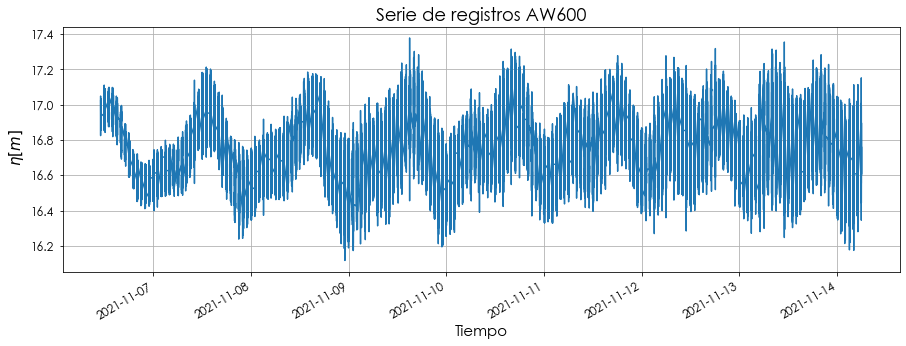

In [55]:
# Plotear la serie de h 
plt.figure(figsize=(5,3))
datos_medidos['h'].plot(figsize=(15, 5), fontsize=12)
plt.xlabel('Tiempo',size=15)
plt.ylabel(' $\eta [m]$',size=15)
plt.title('Serie de registros '+sensor,size = 18)
plt.grid(True)
# ruta = str('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/')  #Ruta para guardar la imagen  
# plt.savefig(ruta+str('serie_')+title+str('.png'),dpi=300,bbox_inches='tight',pad_inches=0)

In [56]:
sample_burst*int(len(datos_medidos)/sample_burst)

191488

In [57]:
# Comprobar que no existan burst incompletos
data_corre = datos_medidos[0:sample_burst*int(len(datos_medidos)/sample_burst)]
if float(len(data_corre))-float(len(datos_medidos))==0:
    print('No existen burst incompletos')
else: 
    pass

In [58]:
len(data_corre)

191488

In [59]:
np.log2(len(data_corre))

17.546894459887636

In [60]:
# Crear una matriz de h y time, cuyas filas son el tamaño de los burst y 
## las columnas la cantidad de burst registrados.
h_burst = np.zeros(shape = (sample_burst,int(len(data_corre)/sample_burst)))
t_burst = np.zeros(shape = (int(len(data_corre)/sample_burst),1),dtype='datetime64[s]')

# Rellenar estas matrices con los datos resgitrados en cada burst
i = 0
for j in range (0,len(data_corre),sample_burst):
    t_burst[i] = data_corre.index[j]
    h_burst[:,i] = data_corre.h[j:j+sample_burst]
    i = i + 1

In [80]:
h_burst[:,0]

array([17.024, 16.937, 16.836, ..., 17.001, 17.013, 16.975])

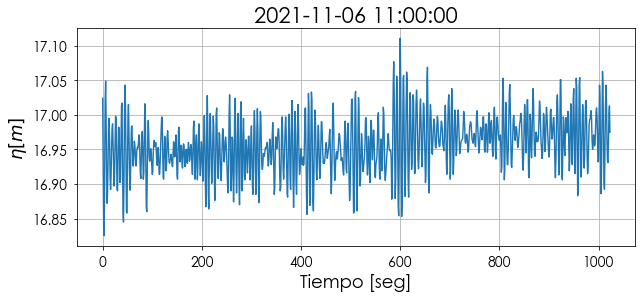

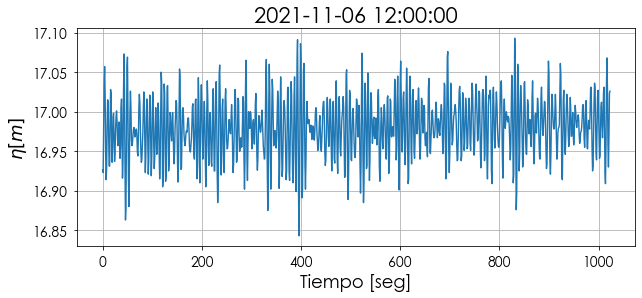

In [61]:
# Plots de las series de presión de cada burst
# h_burst.shape[1]
for i in range (0,2):
    fig=plt.figure(figsize=(10,4))
    figplot=plt.plot(h_burst[:,i])
    plt.xlabel('Tiempo [seg]',size = 18)
    plt.ylabel('$\eta [m]$',size = 18)
    plt.title(str(time2[i]),size=22)
    plt.grid(True)

In [62]:
Marea = np.nanmean(h_burst,axis=0)-np.mean(h_burst)

ValueError: x and y must have same first dimension, but have shapes (187,) and (137,)

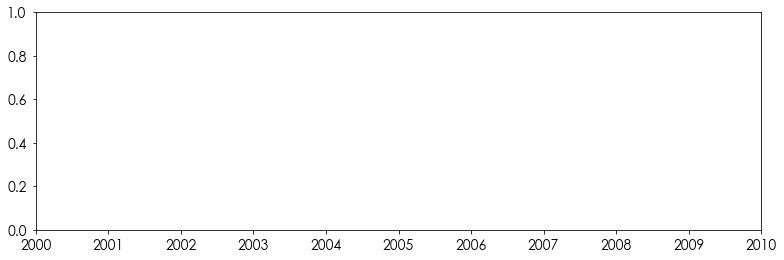

In [48]:
fig=plt.figure(figsize=(13,4))
figplot=plt.plot(time2,Marea,c = 'skyblue')
# figplot=plt.plot(Marea2,c = 'cyan')
plt.xlabel('Date',size = 18)
plt.ylabel('$\eta [m]$',size = 18)
plt.title('Serie de Marea San Andrés',size=22)
plt.grid(True)

#  Eliminar la tendencia

In [63]:
h_detr = np.zeros(shape = h_burst.shape) # Crear una matriz de h sin tendecnias del mismo 
                                         ## tamañao que h con tendencia
for i in range(len(h_burst[1,:])):
    h_detr[:,i] = sc.signal.detrend(h_burst[:,i])

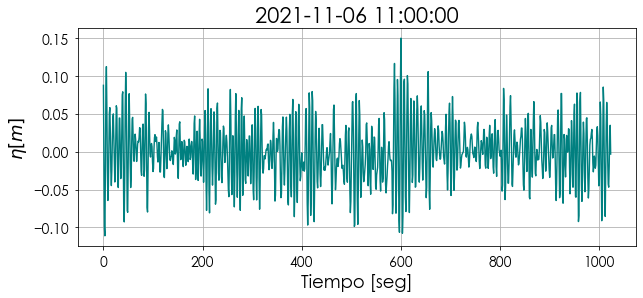

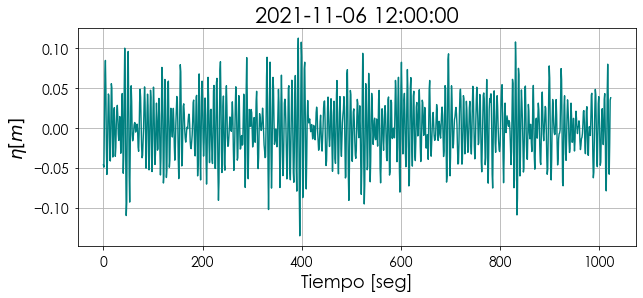

In [64]:
# Plots de las series de presión sin tendencia
# h_detr.shape[1]
for i in range (0,2):
    fig=plt.figure(figsize=(10,4))
    figplot=plt.plot(h_detr[:,i],c = 'teal')
    plt.xlabel('Tiempo [seg]',size = 18)
    plt.ylabel('$\eta [m]$',size = 18)
    plt.title(str(time2[i]),size=22)
    plt.grid(True)

# Análisis temporal

## Definición de funciones 

In [65]:
def wavelength(T,h):
    '''
    Función para determinar la longitud de ola
    -----------
    Parametros de entrada
    T: Periodos de ola 
    h: Profunidad
    -----------
    Returns: 
    L1: Longitud de ola
    '''
    #Función que calcula L en aguas intermedias
    Lo = (9.81*T**2)/(2*np.pi);
    L1  = (9.81*T**2)/(2*np.pi)*np.tanh((h*2*np.pi)/Lo);
    i = 0;
    while (abs(Lo-L1)>0.0001):
        Lo = L1;
        L1  = (9.81*T**2)/(2*np.pi)*np.tanh(h*2*np.pi/Lo);
        i = i+1;
        if (i>5000):
            break
    return (L1)

def zero_crossing(burst,fs,h,zp):
    '''
    Parametros de entrada
    burst: Serie de datos sin tendencia
    fs: frecuencia de muestreo
    h: profundida de medición
    zp: distancia desde el fondo hasta el sensor
    -------------------------------
    Returns:
    Tm: Periodo medio
    Hs: Altura de ola significante
    '''
    # Derterminar las altura de ola y periodos con pasos por cero
    tt = np.arange(1,len(burst)+1,1/fs)
    sign = np.sign(burst)
    index_cross = np.where(np.diff(sign) == 2)[0] 
    Hw = []
    T = []
    for p in range(0,len(index_cross)-1):
        a = index_cross[p]
        b = index_cross[p+1]
        Hw.append(np.max(burst[a:b]) -np.min(burst[a:b]))
        T.append(tt[b]-tt[a])
    Hw = np.array(Hw)
    T = np.array(T)
    
    # Determinar el numero de la ola (k) con la teoría lieneal
    L = []
    for i in range(0,len(T)):
        L.append(wavelength(T[i],h))
    L = np.array(L)
    k = 2*np.pi/L

    # Factor de transferencia Kp
    Kp = np.cosh(k*h)/np.cosh(k*zp)
    for i in range(0,len(Kp)):
        if (Kp[i]>10):
            Kp[i]=10
            
    H=Hw*(Kp)
    H = np.sort(H)
    H = H[::-1]
    H3 = H[:int(len(H)/3)]
    Hs = np.nanmean(H3)
    Tm = np.nanmean(T)
    return (Hs,Tm)
 

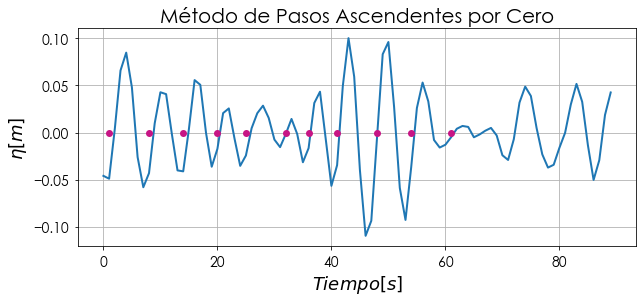

In [66]:
#Comprobar que el metodo este bien programado
sign = np.sign(h_detr[:,1])
index_cross = np.where(np.diff(sign) == 2)[0] 
plt.figure(figsize = (10,4))
plt.plot(h_detr[0:90,1],lw=2)
plt.plot(index_cross[0:11],np.zeros(shape=index_cross.shape)[0:11],'o',ms=7,mfc='mediumvioletred')
plt.title('Método de Pasos Ascendentes por Cero',size =20)
plt.xlabel('$Tiempo [s]$',size = 18)
plt.ylabel('$\eta [m]$',size = 18)
xrango=np.arange(0,63,3)
plt.grid(True)

## Calculo de los estadisticos del oleaje

In [67]:
W_std = np.zeros(shape =(h_detr.shape[1],2)) # Crear una matriz; filas son el número de burst y columnas Hs y Tm respectivamente
for i in range (0,W_std.shape[0]):
    W_std[i] = zero_crossing(h_detr[:,i],fs,hfond,h_sensor) 

Text(0, 0.5, '$T_{m}$ [seg]')

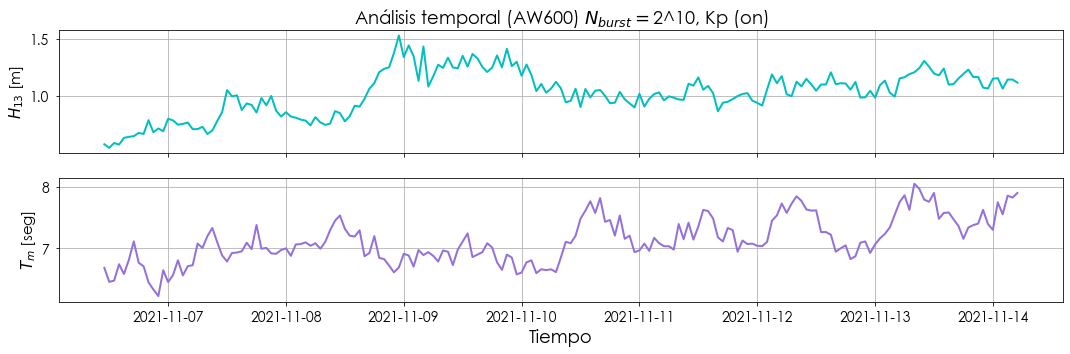

In [68]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,5))
ax1.plot(time2,W_std[:,0],lw=2,ms=10,label='Hs',c='c')
ax1.set_ylabel('$H_{13}$ [m]',size=15)
ax1.set_xticklabels([]) # Apagar las etiquetas 
ax1.grid(True)
ax1.set_title('Análisis temporal ('+sensor+') $N_{burst}=$2^'+str(n)+', Kp ('+str(statekp)+')',size=18)

ax2.plot(time2,W_std[:,1], c = 'mediumpurple',lw=2,label='Tm')
ax2.grid(True)
ax2.set_xlabel('Tiempo',size=18)
ax2.set_ylabel('$T_{m}$ [seg]',size=15)
# ruta=('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/Prueba_codigoOlas/')+\
# str(sensor)+'_H13_Tm_N_2_'+str(n)+'_kp_'+statekp+'.png'
# plt.savefig(ruta,dpi=500,bbox_inches='tight')


# Análisis Espectral

## Definir funciones 

In [69]:
def Fespectro (burst,fs,h,zp):
    """
    Paraemtros de entrada
    burst: Serie de datos sin tendencia
    fs: Frecuencia de muestreo
    h: Profundidad en el punto de muestreo
    zp: Distancia desde el fondo hasta el sensor
    ------------------------------------------------
    Parametros de Salida
    S: Densidad espectral 
    T: Periodos
    Freq: Frecuencia
    
    """
    N = len(burst)
    dt = 1/fs
    g = 9.8
    #Dens_espectral=np.ones(shape=burst.shape)*1j
    FFT = np.fft.fft(burst,N)
    Freq = np.fft.fftfreq(N,dt)
    """
    Eliminar la bajas frecuencias 
    """
    ind_FFT = np.where(np.abs(Freq>0.03))[0]
    FFT = FFT[ind_FFT]
    Freq = Freq[ind_FFT]

    # Transference factor Kp
    w = 2*np.pi*Freq
    k0 = (w**2)/g
    for i in range(0,100):
        k = (w**2)/(g*np.tanh(k0*h))
        k0 = k;
    kp = np.cosh(k*h)/np.cosh(k*zp)
    kp[kp>10]=10
    '''Densidad espectral S'''
    S = (2*dt*(np.abs(FFT)**2)/N)*(kp**2)
    T = 1/Freq
    return (S,Freq,T)

def wave_espectra(S,Freq,fs,burst):
    """
    Parametros de entrada
    burst: Serie de datos sin tendecnia
    fs: Frecuencia de muestreo 
    Freq: Frecuencia
    S: Densidad espectral
    ------------------------------------------------
    Returns:
    Hs: Altura de ola significante 
    Tp: Periodo Pico
    Tm01: Periodo medio de orden 1
    Tm02: Periodo medio de orden 2
    """
    df=fs/len(burst)
    suma= 0
    fs = 0
    ffs = 0
    for i in range (len(S)):
        suma=suma+S[i]
        fs = fs+(Freq[i]*S[i])
        ffs = ffs + ((Freq[i]**2)*S[i])
    Mo = df*suma
    M1 = fs*df
    M2 = ffs*df
    Hs=4.004*np.sqrt(Mo)
    in_max = np.where(S == np.max(S))[0][0]
    Freq_max = Freq[in_max]
    T = 1/(Freq_max)
    Tm01 = Mo/M1
    Tm02 = np.sqrt(Mo/M2)
    return (Hs,T,Tm01,Tm02)
    

In [70]:
h_detr.shape[1]

187

In [71]:
time2.shape

(187,)

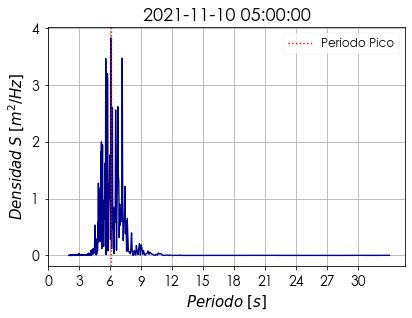

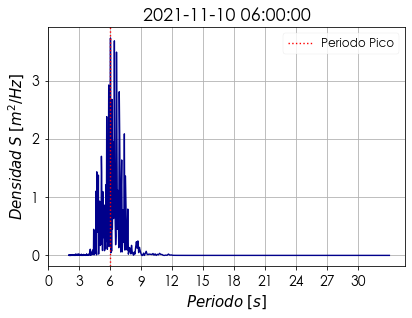

In [72]:
#Grafico de los espectros
# h_detr.shape[1]
for i in range (90,92):
    S,F,T = Fespectro(h_detr[:,i],fs,hfond,h_sensor)
    plt.figure()
    plt.plot(T,S,c='darkblue')
    plt.title(str(time2[i]),size=18)
    plt.ylabel('$Densidad$ $S$ $[m^{2}/Hz]$',size=15)
    plt.xlabel('$Periodo$ $[s]$',size=15)
    plt.axvline(T[np.where(S==np.max(S))[0][0]],color='r',linestyle=':',label='Periodo Pico')
    plt.xticks(np.arange(0,33,3))
    plt.grid(True)
    plt.legend(fontsize=12)
    ruta='Espectro'+'burst'+str(i+1)+'.png'
#   plt.savefig(ruta,dpi=800,bbox_inches='tight',pad_inches=0)

## Calculo de los parámetros de ola

In [73]:
W_s = np.zeros(shape =(h_detr.shape[1],4)) # Crear una matriz para almacernar, Hs,Tp, Tm01, Tm02
for i in range (0,h_detr.shape[1]):
    S,F,T = Fespectro(h_detr[:,i],fs,hfond,h_sensor)
    W_s[i]=wave_espectra(S,F,fs,h_detr[:,i])

In [74]:
M_Energia = np.zeros(shape=(F.shape[0],time2.shape[0]))
for i in range(0,time2.shape[0]):
    S,F,T = Fespectro(h_detr[:,i],fs,hfond,h_sensor)
    M_Energia[:,i]=S

In [75]:
df2 = pd.DataFrame(data=M_Energia,index=F,columns=time2)

In [76]:
df2

,2021-11-06 11:00:00,2021-11-06 12:00:00,2021-11-06 13:00:00,2021-11-06 14:00:00,2021-11-06 15:00:00,2021-11-06 16:00:00,2021-11-06 17:00:00,2021-11-06 18:00:00,2021-11-06 19:00:00,2021-11-06 20:00:00,...,2021-11-13 20:00:00,2021-11-13 21:00:00,2021-11-13 22:00:00,2021-11-13 23:00:00,2021-11-14 00:00:00,2021-11-14 01:00:00,2021-11-14 02:00:00,2021-11-14 03:00:00,2021-11-14 04:00:00,2021-11-14 05:00:00
0.030273,0.000007,0.000012,0.000002,0.000384,0.000107,0.000123,0.000241,0.000318,0.000164,0.000104,...,0.000576,0.003096,0.001001,0.004916,0.000100,0.000189,0.000158,0.001007,0.000700,0.001144
0.031250,0.000319,0.000280,0.000150,0.000375,0.000055,0.000419,0.000695,0.000086,0.000114,0.000349,...,0.002026,0.000142,0.001940,0.000010,0.000579,0.001010,0.000739,0.001622,0.001751,0.000479
0.032227,0.000140,0.000245,0.000064,0.000645,0.000834,0.000312,0.000532,0.000219,0.000209,0.000018,...,0.000809,0.000675,0.000761,0.000115,0.000102,0.001514,0.000119,0.000640,0.001139,0.000458
0.033203,0.000024,0.000261,0.000540,0.000044,0.000114,0.000663,0.000303,0.000184,0.000146,0.000037,...,0.000735,0.000780,0.003267,0.001839,0.003073,0.000548,0.000023,0.000364,0.000046,0.002633
0.034180,0.000220,0.000138,0.000110,0.000685,0.000354,0.000392,0.000602,0.000228,0.000352,0.000022,...,0.000642,0.001657,0.002451,0.001345,0.000649,0.003152,0.003544,0.002651,0.000180,0.004579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.495117,0.003109,0.000032,0.000502,0.002331,0.001649,0.000427,0.000363,0.000768,0.000399,0.000215,...,0.006685,0.001221,0.000640,0.000652,0.000927,0.013607,0.001119,0.002655,0.002586,0.004669
0.496094,0.000731,0.000373,0.001268,0.000277,0.001356,0.000318,0.004139,0.001250,0.000909,0.000530,...,0.006636,0.000348,0.004652,0.006614,0.003311,0.018734,0.001783,0.014123,0.000206,0.006959
0.497070,0.003280,0.000659,0.001048,0.000662,0.000055,0.000141,0.001804,0.000292,0.002002,0.001488,...,0.007362,0.000530,0.001230,0.002105,0.003099,0.015123,0.002039,0.013730,0.003374,0.019008
0.498047,0.005437,0.003483,0.004359,0.002940,0.000962,0.000231,0.000331,0.005530,0.000092,0.000029,...,0.006613,0.001058,0.001333,0.000292,0.001942,0.012963,0.001514,0.007801,0.002304,0.006887


In [82]:
# file = open('Espectros_AW1.txt',"w")
# np.savetxt(file,df2)
# file.close

In [83]:
# df2.to_csv(r"E:\Escritorio\Esctritorio\Espectros_AW1.csv",sep=';',index='True')

In [84]:
M_Energia

array([[6.97808110e-06, 1.18175191e-05, 2.08935785e-06, ...,
        1.00702982e-03, 7.00263746e-04, 1.14368935e-03],
       [3.18995236e-04, 2.80469782e-04, 1.49965893e-04, ...,
        1.62188755e-03, 1.75123518e-03, 4.79322128e-04],
       [1.40076284e-04, 2.45400749e-04, 6.43692143e-05, ...,
        6.39705712e-04, 1.13915389e-03, 4.58011004e-04],
       ...,
       [3.27995529e-03, 6.59256957e-04, 1.04756910e-03, ...,
        1.37302533e-02, 3.37426304e-03, 1.90077319e-02],
       [5.43685579e-03, 3.48295344e-03, 4.35872984e-03, ...,
        7.80050987e-03, 2.30393622e-03, 6.88672101e-03],
       [3.01612659e-04, 5.30706674e-04, 3.62478357e-03, ...,
        1.18932999e-02, 5.86717239e-03, 1.90757069e-02]])

In [39]:
df2.to_excel(r"E:\Escritorio\Esctritorio\Espectros_AW1.xlsx")

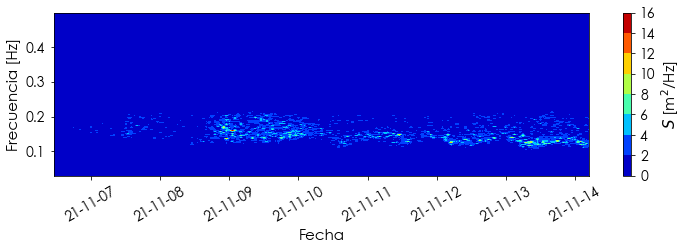

In [77]:
import matplotlib.dates as mdates
fig = plt.figure(figsize = (12,3))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()
# colormap = reverse_colourmap(cm.RdYlBu)
colormap = cm.jet
# colormap = cm.cool
pc = ax.contourf( time2,F, M_Energia,cmap = colormap)
cb=plt.colorbar(pc)
date_format = mdates.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
# a = ax.contour(Dir, frec, S,levels=list(np.arange(0.004,0.024,0.003)),colors="rosybrown",\
#                linewidths=1.5)
# plt.clabel(a, fontsize=9, inline=1,fmt='%2.1f',colors='k')
ax.set_xlabel(u'Fecha',size=15)
ax.set_ylabel(u'Frecuencia [Hz]',size=15)
cb.set_label('$S$ [m$^{2}$/Hz]',size=15)
# ax.set_ylim([0.03, 0.25])
plt.xticks(rotation=30)
plt.grid(False)

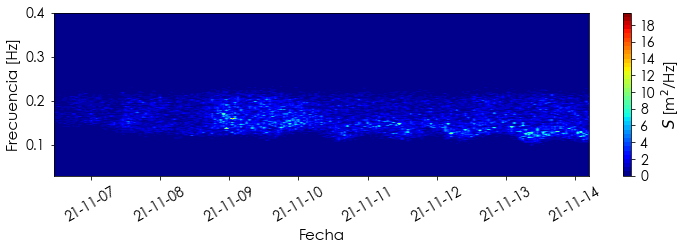

In [78]:
import matplotlib.dates as mdates
fig = plt.figure(figsize = (12,3))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()
# colormap = reverse_colourmap(cm.RdYlBu)
colormap = cm.jet
# colormap = cm.cool
pc = ax.contourf( time2,F, M_Energia,levels = np.arange(0,20,0.5),cmap = colormap)
cb=plt.colorbar(pc)
date_format = mdates.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
# a = ax.contour(Dir, frec, S,levels=list(np.arange(0.004,0.024,0.003)),colors="rosybrown",\
#                linewidths=1.5)
# plt.clabel(a, fontsize=9, inline=1,fmt='%2.1f',colors='k')
ax.set_xlabel(u'Fecha',size=15)
ax.set_ylabel(u'Frecuencia [Hz]',size=15)
cb.set_label('$S$ [m$^{2}$/Hz]',size=15)
ax.set_ylim([0.03, 0.4])
plt.xticks(rotation=30)
plt.grid(False)

Text(0, 0.5, '$T_{p}$ [seg]')

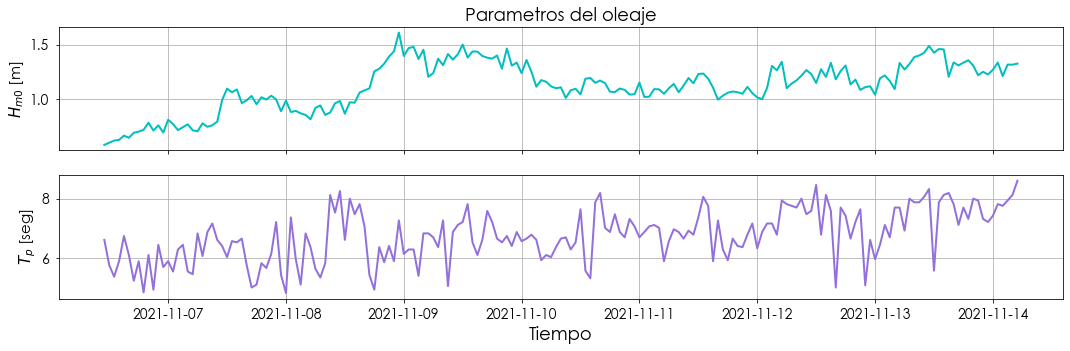

In [79]:
# Plot de altura de ola y periodo pico
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,5))
ax1.plot(time2,W_s[:,0],lw=2,ms=10,label='Hs',c='c')
ax1.set_ylabel('$H_{m0}$ [m]',size=15)
ax1.set_xticklabels([]) # Apagar las etiquetas 
ax1.grid(True)
ax1.set_title('Parametros del oleaje',size=18)


ax2.plot(time2,W_s[:,1], c = 'mediumpurple',lw=2,label='Tm')
ax2.grid(True)
ax2.set_xlabel('Tiempo',size=18)
ax2.set_ylabel('$T_{p}$ [seg]',size=15)
# ruta=('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/Prueba_codigoOlas/')+\
# str(sensor)+'_Hm0_Tp_N_2_'+str(n)+'_kp_'+statekp+'.png'
# plt.savefig(ruta,dpi=500,bbox_inches='tight')

# Comparar resultados de ambos métodos

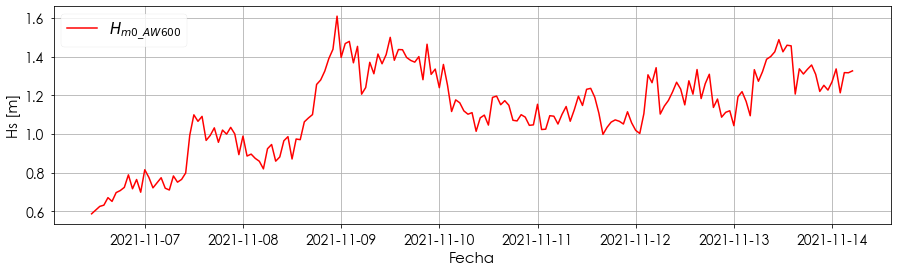

In [91]:
plt.figure(figsize = (15,4))
plt.plot(time2,W_s[:,0],lw=1.5,label='$H_{m0\_'+str(sensor)+'}$',c='red')
# plt.plot(time2,W_std[:,0],lw=1.5,label='$H_{13\_'+str(sensor)+'}$', c = 'k')
plt.ylabel('Hs [m]',size=15)
plt.xlabel('Fecha',size=15)
plt.legend(fontsize=15)
plt.grid(True)
# plt.title('$H_{m0\_'+str(sensor)+'}$ y $H_{13\_'+str(sensor)+'}$, $N_{burst}=$2^'+str(n),size=18)
# ruta=('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/Prueba_codigoOlas/')+\
# str(sensor)+'_Hm0_H13_N_2_'+str(n)+'_kp_'+statekp+'.png'
# plt.savefig(ruta,dpi=500,bbox_inches='tight')

Text(0.5, 1.0, '$T_{m01\\_AW600}$ y $T_{m\\_AW600}$,  $N_{burst}=$2^10, Kp (on)')

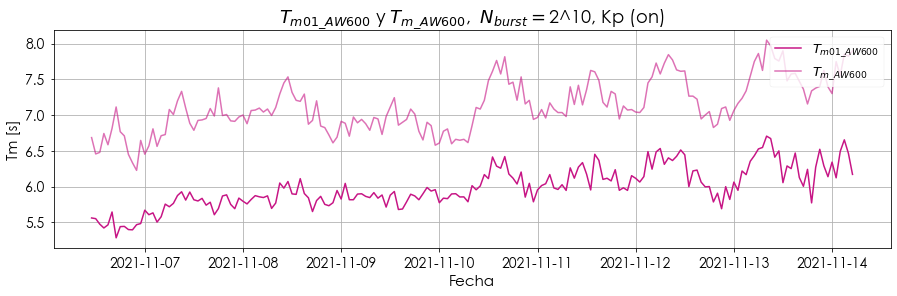

In [92]:
plt.figure(figsize = (15,4))
plt.plot(time2,W_s[:,2],lw=1.5,label='$T_{m01\_'+str(sensor)+'}$',c='mediumvioletred')
plt.plot(time2,W_std[:,1],lw=1.5,label='$T_{m\_'+str(sensor)+'}$',c='mediumvioletred', alpha=0.6)
plt.ylabel('Tm [s]',size=15)
plt.xlabel('Fecha',size=15)
plt.legend(loc='upper right',fontsize=13)
plt.grid()
plt.title('$T_{m01\_'+str(sensor)+'}$ y $T_{m\_'+str(sensor)+'}$,  $N_{burst}=$2^'+str(n)+', Kp ('+str(statekp)+')',size=18)
# ruta=('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/Prueba_codigoOlas/')+\
# str(sensor)+'_Tm01_Tm_N_2_'+str(n)+'_kp_'+statekp+'.png'
# plt.savefig(ruta,dpi=500,bbox_inches='tight')

# Exportar archivo con Hs y Tp

In [62]:
df = pd.DataFrame(data = np.c_[time2,W_s[:,0],W_s[:,1],Marea], columns=['time','Hs','Tp','n'])
ruta = r"E:\Documentos\DATOS_CAMPO-SAI-PROV-MARZO2021\Providencia\AWAC600"
df.to_excel(ruta+str('\Serie_AWAC600.xlsx'))

In [63]:
year = np.array([i.year for i in time2])
month = np.array([i.month for i in time2])
day = np.array([i.day for i in time2])
hour = np.array([i.hour for i in time2])
minute = np.array([i.minute for i in time2])
second = np.array([i.second for i in time2])

In [64]:
df2= pd.DataFrame(data= year,columns=['year'])
df2['month']= month
df2['day'] = day
df2['hour'] = hour
df2['minute']= minute
df2['second'] = second
df2['Hs[m]'] = W_s[:,0]
df2['Tp[s]'] = W_s[:,1]
df2['n[m]'] = Marea

In [65]:
df2

,year,month,day,hour,minute,second,Hs[m],Tp[s],n[m]
0,2021,3,6,11,0,0,0.510947,7.013699,-0.045711
1,2021,3,6,12,0,0,0.508831,6.400000,-0.109406
2,2021,3,6,13,0,0,0.509907,6.965986,-0.142298
3,2021,3,6,14,0,0,0.544904,6.440252,-0.150550
4,2021,3,6,15,0,0,0.485996,6.872483,-0.138697
...,...,...,...,...,...,...,...,...,...
312,2021,3,19,11,0,0,1.776772,8.827586,-0.128988
313,2021,3,19,12,0,0,1.709368,9.061947,-0.140914
314,2021,3,19,13,0,0,1.744722,8.325203,-0.133704
315,2021,3,19,14,0,0,1.721551,8.192000,-0.122705


In [70]:
file = open(ruta+'\Prov_AWAC600.txt',"w")
file.write('year month day hour minute second Hs[m] Tp[s] n[m]\n')
np.savetxt(file,df2,fmt =('%2.f  %2.f  %2.f  %2.f  %2.f  %2.f %2.9f  %1.9f %1.9f'))
file.close()

In [71]:
Diccionario = {}
# for i in range(W_s[:,1].shape[0]):
#     year2 = year[i]
Diccionario.setdefault('year',year)
Diccionario.setdefault('month',month)
Diccionario.setdefault('day',day)
Diccionario.setdefault('hour',hour)
Diccionario.setdefault('minute',minute)
Diccionario.setdefault('second',second)
Diccionario.setdefault('Hs',W_s[:,0])
Diccionario.setdefault('Tp',W_s[:,1])
Diccionario.setdefault('n',Marea)

array([-0.04571115, -0.10940647, -0.14229807, -0.15055002, -0.13869748,
       -0.11322873, -0.08328537, -0.05268576, -0.03031174, -0.02055393,
       -0.03910275, -0.07145822, -0.09052951, -0.08398947, -0.0614094 ,
       -0.01822678,  0.04169217,  0.105241  ,  0.1582283 ,  0.19433865,
        0.21359549,  0.20314334,  0.16156717,  0.08968338,  0.0036658 ,
       -0.07593088, -0.12769846, -0.15707932, -0.16370236, -0.14483518,
       -0.11059397, -0.07442697, -0.04455979, -0.02428928, -0.02407834,
       -0.05138108, -0.08053928, -0.10345432, -0.1058342 , -0.08279904,
       -0.03106272,  0.04144705,  0.10989432,  0.17592361,  0.21630252,
        0.22483377,  0.19966482,  0.14667947,  0.07486502, -0.01200022,
       -0.0844924 , -0.13532932, -0.16118479, -0.15885666, -0.12734006,
       -0.09072678, -0.05168186, -0.02956272, -0.01947873, -0.02744553,
       -0.05249826, -0.08719358, -0.11225412, -0.12096506, -0.09329904,
       -0.03676877,  0.03630057,  0.11649783,  0.17936014,  0.21

In [72]:
sio.savemat(ruta+'\Hs_Tp_Prov_AWAC600.mat', Diccionario)